![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [13]:
# Start your code here!
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats.distributions import norm
from statsmodels.graphics.gofplots import qqplot

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

women = pd.read_csv('women_results.csv', index_col=0, parse_dates=['date'])
men = pd.read_csv('men_results.csv', index_col=0, parse_dates=['date'])

In [14]:
# Peform exploratory data analysis
def eda_df(dataframe):
    print('SHAPE'.center(50, '='))
    print(dataframe.shape)
    print('INFO'.center(50, '='))
    print(dataframe.info())
    print('TOTAL NULL VALUES (IF ANY)'.center(50, '='))
    print(dataframe.isna().sum())
    print('PREVIEW'.center(50, '='))
    print(dataframe.head())

    for col in dataframe.columns:
        print(dataframe[col].value_counts(normalize=True))

eda_df(women)
eda_df(men)

======================SHAPE=======================
(4884, 6)
=======================INFO=======================
<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64         
 5   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 267.1+ KB
None
============TOTAL NULL VALUES (IF ANY)============
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64
=====================PREVIEW======================
        date home_team  away_team  home_score  away_score        tournament
0 1969-11-01     Italy     France       

In [15]:
# Filtering only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01` as per project scope

def filter_compute_df(df):
    filtered_df = df.loc[(df['tournament'] == 'FIFA World Cup') & (df['date'] >= '2002-01-01')]
    filtered_df['total_goals_scored'] = filtered_df['home_score'] + filtered_df['away_score']
    return filtered_df

filtered_women = filter_compute_df(women)
filtered_men = filter_compute_df(men)

C:\Users\Wei Qin\AppData\Local\Temp\ipykernel_26168\3412475238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_goals_scored'] = filtered_df['home_score'] + filtered_df['away_score']
C:\Users\Wei Qin\AppData\Local\Temp\ipykernel_26168\3412475238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_goals_scored'] = filtered_df['home_score'] + filtered_df['away_score']


In [16]:
eda_df(filtered_women)
eda_df(filtered_men)

======================SHAPE=======================
(200, 7)
=======================INFO=======================
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1600 to 4469
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                200 non-null    datetime64[ns]
 1   home_team           200 non-null    object        
 2   away_team           200 non-null    object        
 3   home_score          200 non-null    int64         
 4   away_score          200 non-null    int64         
 5   tournament          200 non-null    object        
 6   total_goals_scored  200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 12.5+ KB
None
============TOTAL NULL VALUES (IF ANY)============
date                  0
home_team             0
away_team             0
home_score            0
away_score            0
tournament            0
total_goals_

p-value: 3.8908293844628985e-13 test stat: 0.8491
p-value < 0.05, distribution is not normal
p-value: 8.894989197030093e-13 test stat: 0.9266
p-value < 0.05, distribution is not normal


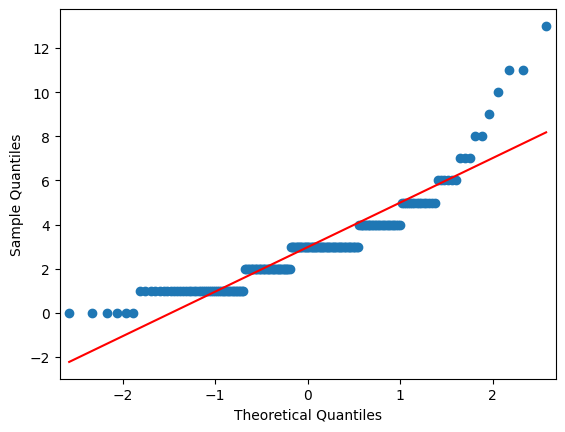

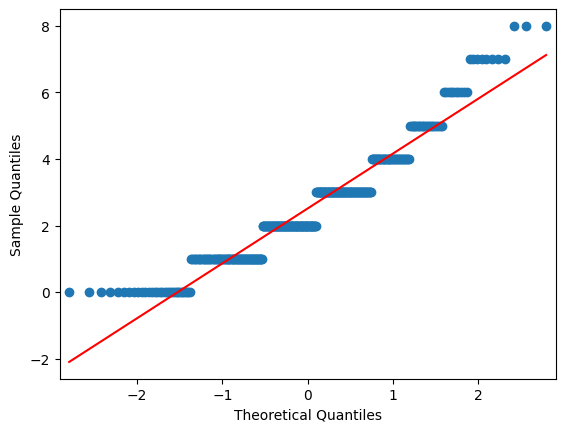

In [17]:
# Test for Normality using Shapiro-Wilk Test and QQPlot
def shapiro_qqplot(data, alpha):
    stat, p = shapiro(data)
    print(f"p-value: {p} test stat: {round(stat, 4)}")
    if p <= alpha:
        print(f"p-value < {alpha}, distribution is not normal")
    
    else:
        print(f"p-value > {alpha}, distribution is normal")

    qqplot(data, line='s', dist=norm)

shapiro_qqplot(filtered_women['total_goals_scored'], 0.05)
shapiro_qqplot(filtered_men['total_goals_scored'], 0.05)


In [18]:
# Perform Wilcoxon-Mann-Whitney (Mann-Whitney U) at 10% significance level - non-normal counter part of two-sample independent t-tests
stat, p_val = mannwhitneyu(filtered_women['total_goals_scored'], filtered_men['total_goals_scored'], alternative="greater")
alpha = 0.01
if p_val > alpha:
    result = "fail to reject"
    print("Fail to reject null hypothesis (There is no significant difference between goal scores of men and women (p>0.1)).")
else:
    result = 'reject'
    print("Reject null hypothesis (There is a significant difference between goal scores of men and women (p<0.1)).")

result_dict = {"p_val": p_val, "result": result}
print(result_dict)

Reject null hypothesis (There is a significant difference between goal scores of men and women (p<0.1)).
{'p_val': np.float64(0.005106609825443641), 'result': 'reject'}
